<a href="https://colab.research.google.com/github/vijayganeshn96/Real-Time-Crash-Detection-and-Response-System-Using-Django-and-Computer-Vision-/blob/main/accident_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [20]:
## loading training set
training_data = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/ColabNotebooks/data/train',seed=42,image_size= (img_height, img_width),batch_size=batch_size,color_mode='rgb')

Found 791 files belonging to 2 classes.


In [21]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [23]:
## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ColabNotebooks/data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 98 files belonging to 2 classes.


In [24]:
## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ColabNotebooks/data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 100 files belonging to 2 classes.


In [25]:
testing_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [27]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # Conv2D(f_size, filter_size, activation) # relu, sigmoid, softmax
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 250, 250, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      22,151,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,541,134 (85.99 MB)

 Trainable params: 22,541,128 (85.99 MB)

 Non-trainable params: 6 (24.00 B)

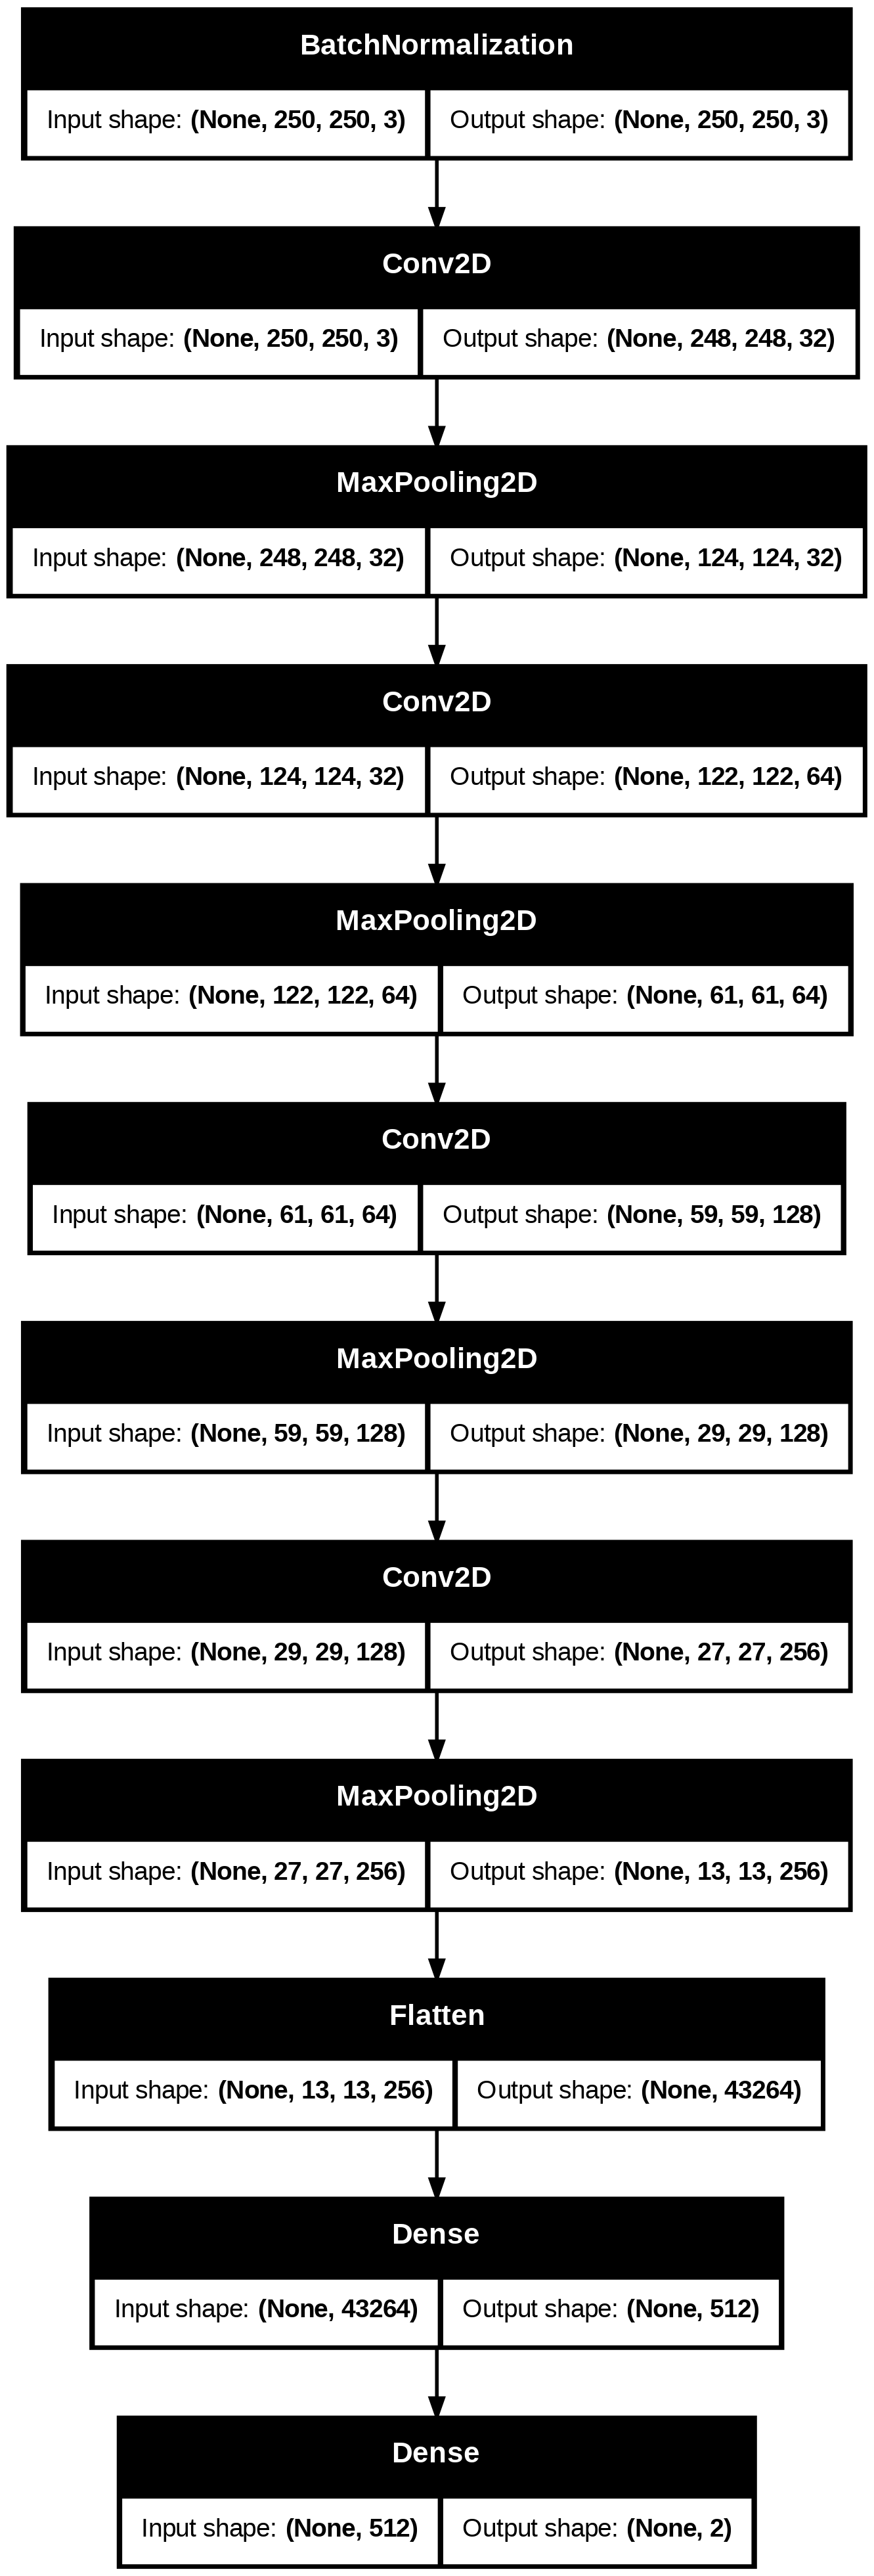

In [30]:
plot_model(model, show_shapes=True)

In [31]:
## lets train our CNN
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs = 20, callbacks=callbacks_list)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.5057 - loss: 4.2226 
Epoch 1: val_accuracy improved from -inf to 0.53061, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 200s 23s/step - accuracy: 0.5077 - loss: 4.0722 - val_accuracy: 0.5306 - val_loss: 1.6829
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.5245 - loss: 0.7114 
Epoch 2: val_accuracy did not improve from 0.53061
8/8 ━━━━━━━━━━━━━━━━━━━━ 158s 19s/step - accuracy: 0.5256 - loss: 0.7100 - val_accuracy: 0.5306 - val_loss: 0.7067
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.5653 - loss: 0.6856 
Epoch 3: val_accuracy did not improve from 0.53061
8/8 ━━━━━━━━━━━━━━━━━━━━ 202s 20s/step - accuracy: 0.5646 - loss: 0.6853 - val_accuracy: 0.5306 - val_loss: 0.7784
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.6005 - loss: 0.6701 
Epoch 4: val_accuracy did not improve from 0.53061
8/8 ━━━━━━━━━━━━━━━━━━━━ 167s 21s/step - accuracy: 0.6015 - loss: 0.6694 - val_accuracy: 0.5306 - val_loss: 0.7759
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.6572 - loss: 0.6375 
Epoch 5: val_accuracy improved from 0.53061 to 0.66327,

8/8 ━━━━━━━━━━━━━━━━━━━━ 158s 20s/step - accuracy: 0.6569 - loss: 0.6365 - val_accuracy: 0.6633 - val_loss: 0.6461
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.6784 - loss: 0.5950 
Epoch 6: val_accuracy improved from 0.66327 to 0.72449, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 201s 20s/step - accuracy: 0.6811 - loss: 0.5938 - val_accuracy: 0.7245 - val_loss: 0.6143
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.6880 - loss: 0.5609 
Epoch 7: val_accuracy did not improve from 0.72449
8/8 ━━━━━━━━━━━━━━━━━━━━ 167s 21s/step - accuracy: 0.6916 - loss: 0.5590 - val_accuracy: 0.6531 - val_loss: 0.6689
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.7534 - loss: 0.5047 
Epoch 8: val_accuracy did not improve from 0.72449
8/8 ━━━━━━━━━━━━━━━━━━━━ 155s 20s/step - accuracy: 0.7553 - loss: 0.5029 - val_accuracy: 0.6224 - val_loss: 0.7434
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.7989 - loss: 0.4139 
Epoch 9: val_accuracy did not improve from 0.72449
8/8 ━━━━━━━━━━━━━━━━━━━━ 156s 20s/step - accuracy: 0.8006 - loss: 0.4123 - val_accuracy: 0.6735 - val_loss: 0.7510
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.8491 - loss: 0.3337 
Epoch 10: val_accuracy improved from 0.72449 to 0.7857

8/8 ━━━━━━━━━━━━━━━━━━━━ 198s 19s/step - accuracy: 0.8509 - loss: 0.3315 - val_accuracy: 0.7857 - val_loss: 0.5814
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.9132 - loss: 0.2502 
Epoch 11: val_accuracy did not improve from 0.78571
8/8 ━━━━━━━━━━━━━━━━━━━━ 164s 21s/step - accuracy: 0.9132 - loss: 0.2481 - val_accuracy: 0.7755 - val_loss: 0.6104
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9184 - loss: 0.2191 
Epoch 12: val_accuracy did not improve from 0.78571
8/8 ━━━━━━━━━━━━━━━━━━━━ 151s 19s/step - accuracy: 0.9176 - loss: 0.2171 - val_accuracy: 0.7653 - val_loss: 0.8490
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9096 - loss: 0.1949 
Epoch 13: val_accuracy improved from 0.78571 to 0.79592, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 158s 20s/step - accuracy: 0.9107 - loss: 0.1931 - val_accuracy: 0.7959 - val_loss: 0.6328
Epoch 14/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9285 - loss: 0.1634 
Epoch 14: val_accuracy did not improve from 0.79592
8/8 ━━━━━━━━━━━━━━━━━━━━ 155s 19s/step - accuracy: 0.9278 - loss: 0.1646 - val_accuracy: 0.7755 - val_loss: 0.8710
Epoch 15/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.9301 - loss: 0.1728 
Epoch 15: val_accuracy improved from 0.79592 to 0.81633, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 164s 21s/step - accuracy: 0.9318 - loss: 0.1693 - val_accuracy: 0.8163 - val_loss: 0.5446
Epoch 16/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9581 - loss: 0.1193 
Epoch 16: val_accuracy improved from 0.81633 to 0.85714, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 155s 20s/step - accuracy: 0.9581 - loss: 0.1187 - val_accuracy: 0.8571 - val_loss: 0.5588
Epoch 17/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9685 - loss: 0.1088 
Epoch 17: val_accuracy did not improve from 0.85714
8/8 ━━━━━━━━━━━━━━━━━━━━ 155s 20s/step - accuracy: 0.9688 - loss: 0.1069 - val_accuracy: 0.8571 - val_loss: 0.4282
Epoch 18/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9636 - loss: 0.0948 
Epoch 18: val_accuracy improved from 0.85714 to 0.87755, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 156s 20s/step - accuracy: 0.9644 - loss: 0.0935 - val_accuracy: 0.8776 - val_loss: 0.4248
Epoch 19/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9664 - loss: 0.0949 
Epoch 19: val_accuracy did not improve from 0.87755
8/8 ━━━━━━━━━━━━━━━━━━━━ 203s 19s/step - accuracy: 0.9671 - loss: 0.0931 - val_accuracy: 0.8367 - val_loss: 0.7596
Epoch 20/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9626 - loss: 0.0854 
Epoch 20: val_accuracy improved from 0.87755 to 0.89796, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 196s 19s/step - accuracy: 0.9638 - loss: 0.0830 - val_accuracy: 0.8980 - val_loss: 0.3722


In [32]:
###### serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

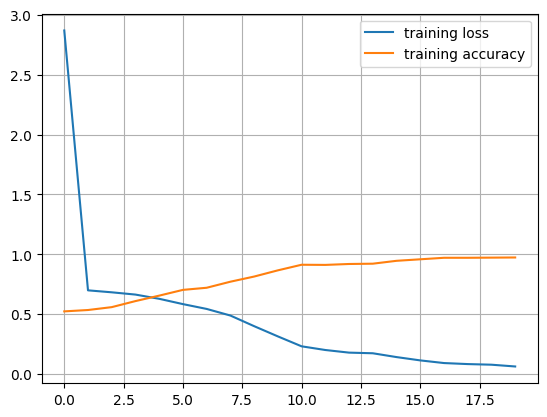

In [33]:
## stats on training data
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

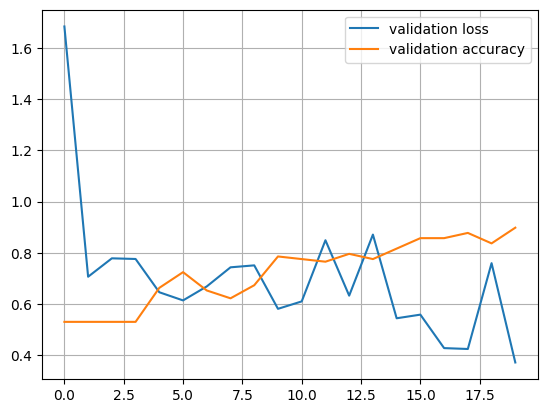

In [34]:
## stats on training data
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


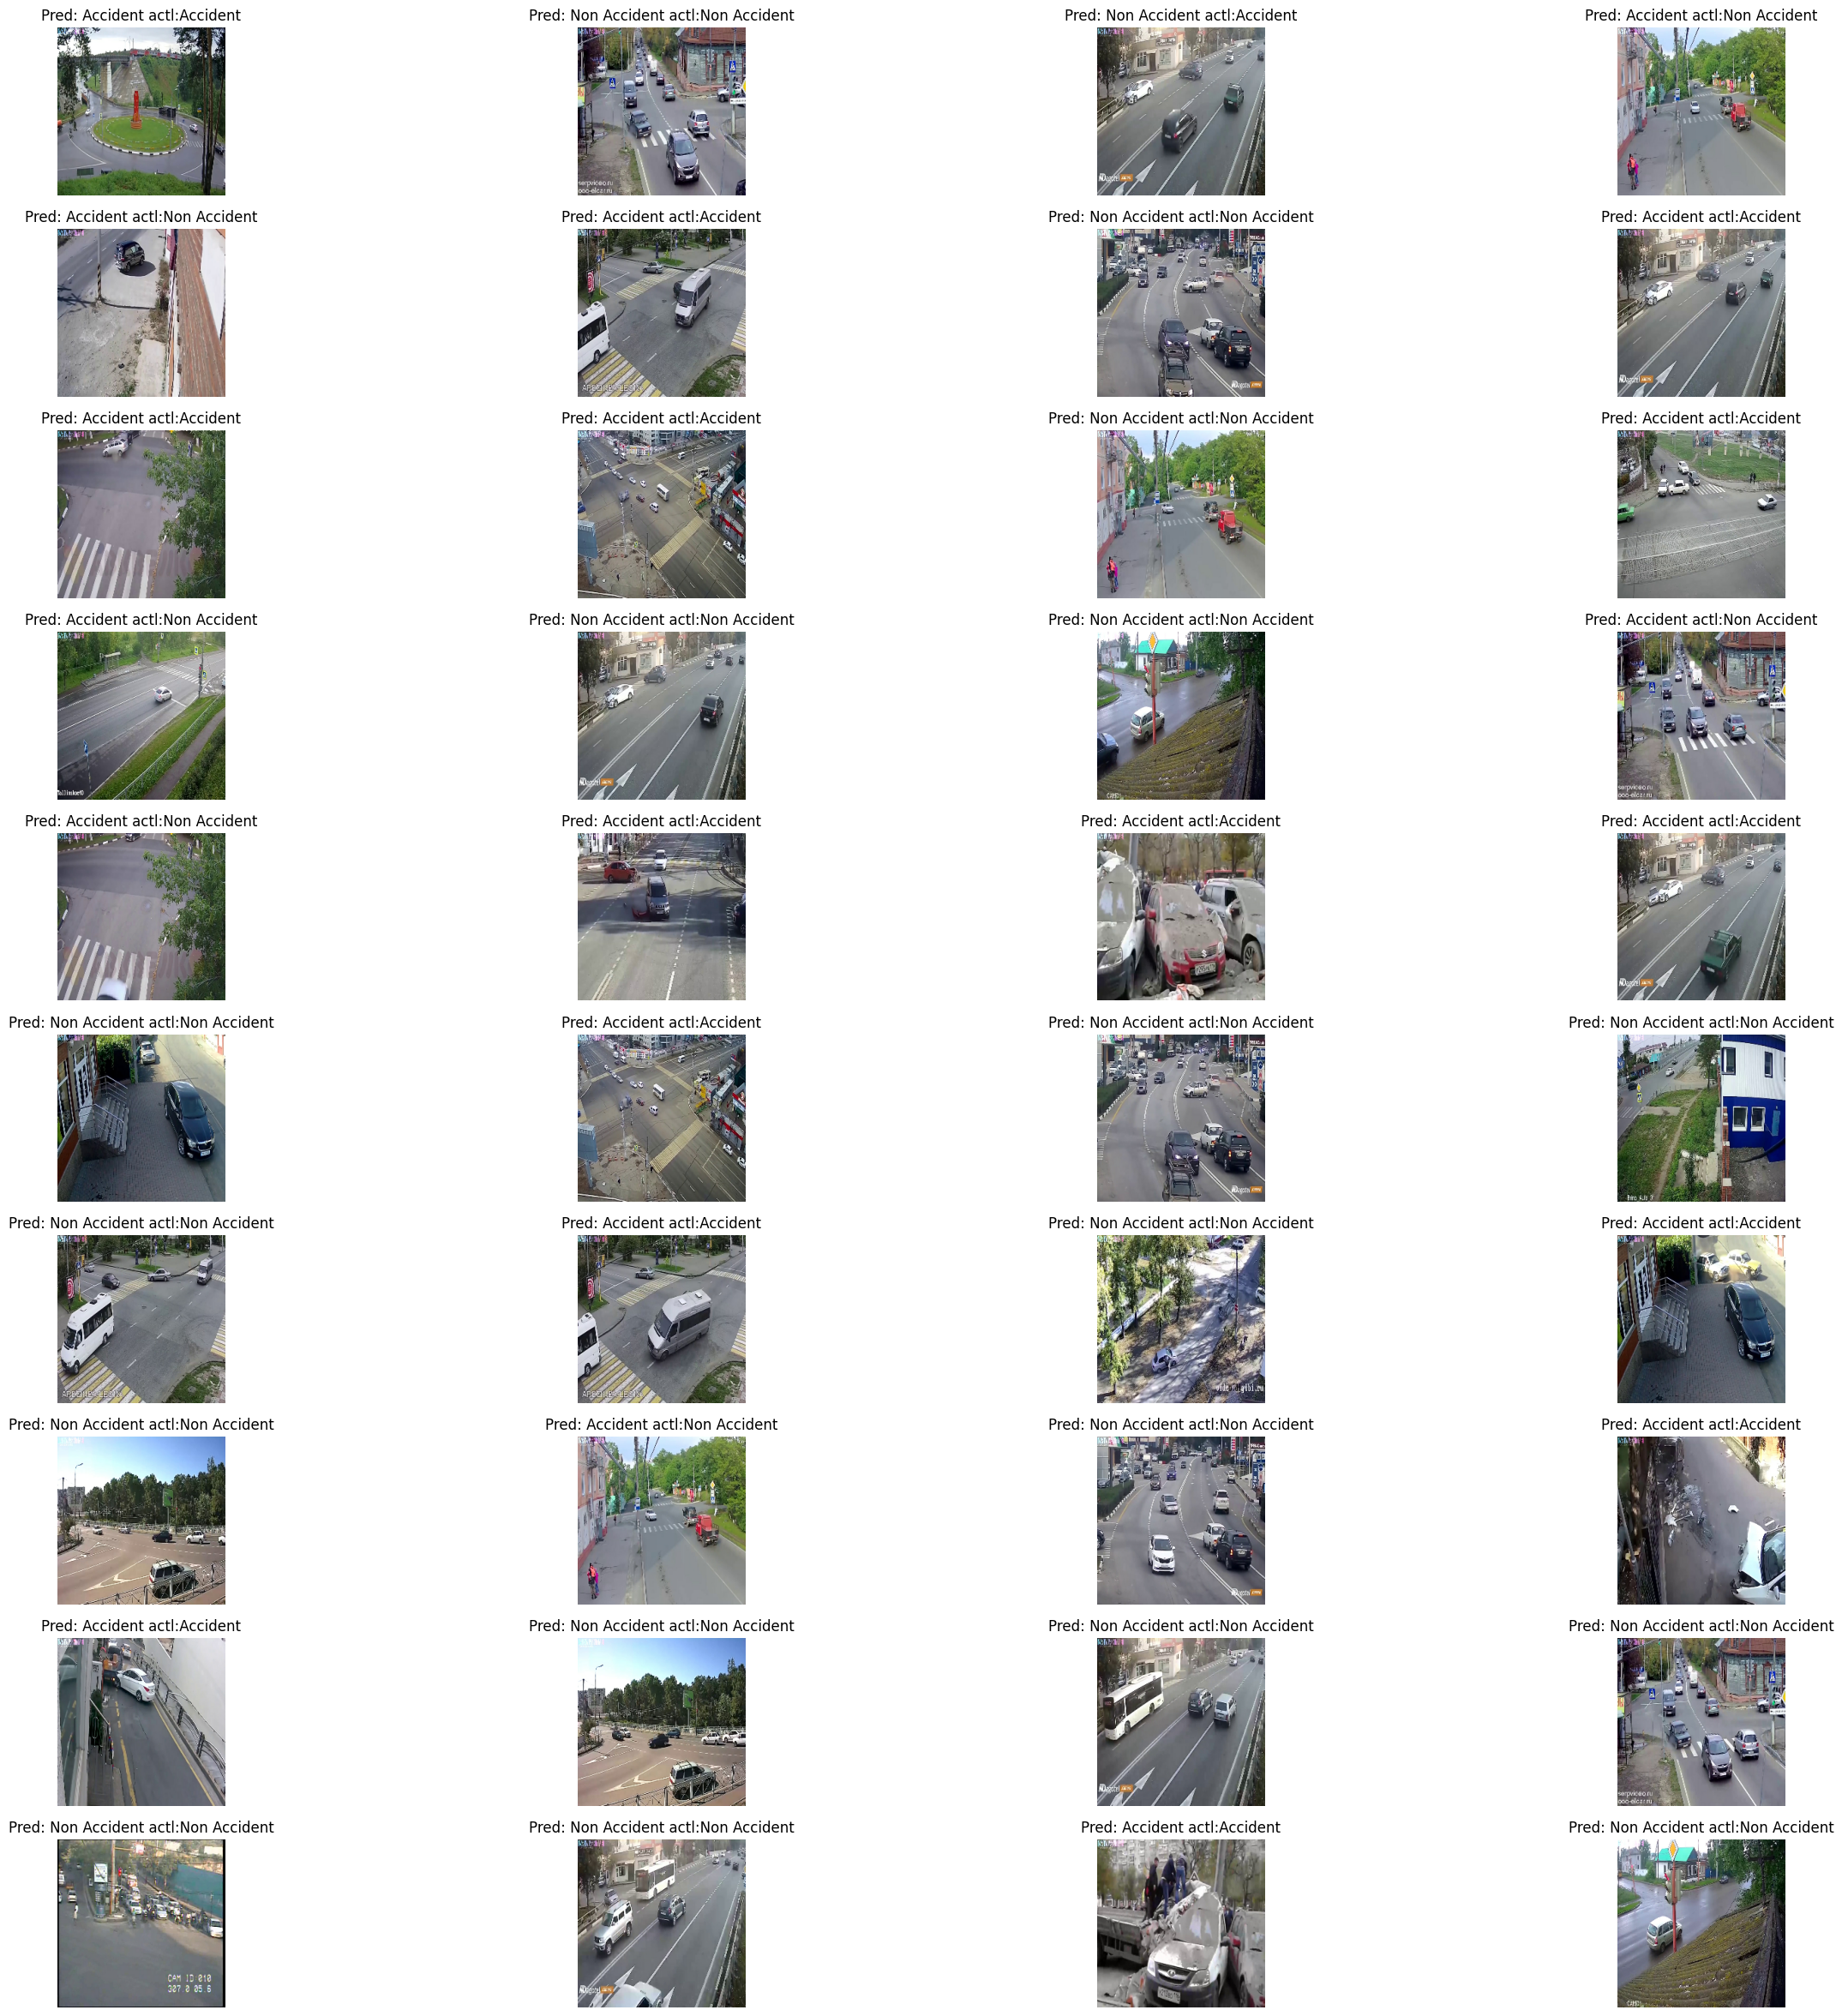

In [35]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)